In [4]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('ddd3.csv')  # Replace with your CSV file path
H_values = data['infection_fatality'].values


In [3]:
X = H_values[:-1]
y = H_values[1:]


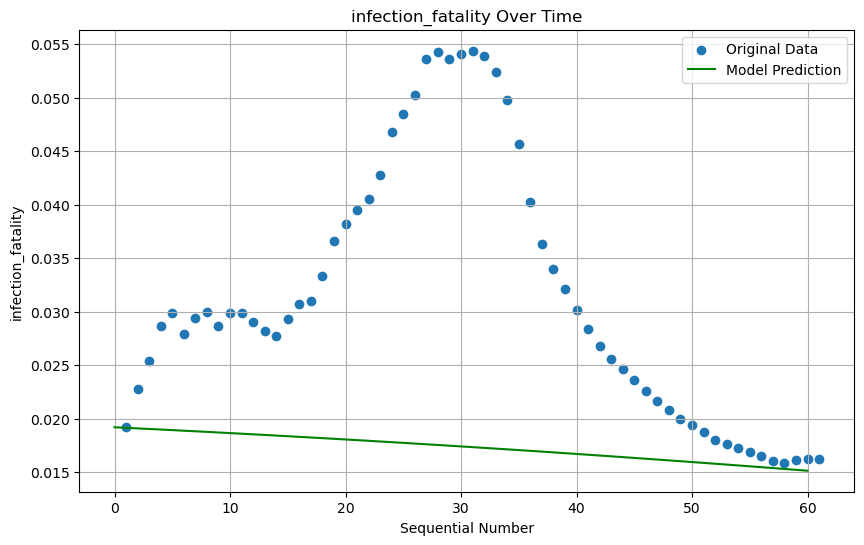

In [7]:
def model_function(H_k, a, b,c,d):
    return a * H_k + b * H_k**2 + c*H_k**3+d*H_k**4

params, params_covariance = curve_fit(model_function, X, y)

a_opt, b_opt, c_opt,d_opt= params

H0 = 0.0192
a = a_opt 
b = b_opt 
c = c_opt
d = d_opt

H = [H0]
for i in range(60):
    H0 = a * H0 + b * H0**2 + c*H0**3 + d*H0**4
    H.append(H0)


data['sequential_number'] = range(1, len(data) + 1)

plt.figure(figsize=(10, 6))
plt.scatter(data['sequential_number'], data['infection_fatality'], label='Original Data')
plt.plot(range(61), H, color='green', label='Model Prediction')
plt.title('infection_fatality Over Time')
plt.xlabel('Sequential Number')
plt.ylabel('infection_fatality')
plt.legend()
plt.grid(True)
plt.show()

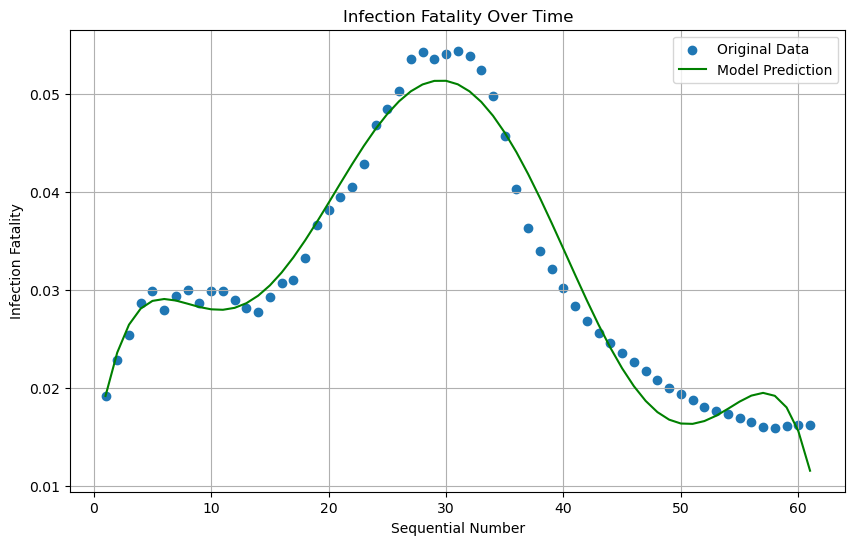

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Load the data
data = pd.read_csv('ddd3.csv')  # Replace with your CSV file path
H_values = data['infection_fatality'].values.reshape(-1, 1)
X = np.arange(len(H_values)).reshape(-1, 1)  # Sequential numbers as X

# Create polynomial features
degree = 6  
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
polyreg.fit(X, H_values)

# Use the model to predict values
H_pred = polyreg.predict(X)

# Add a sequential number to the data for plotting
data['sequential_number'] = range(1, len(data) + 1)

# Plot the original data and the model prediction
plt.figure(figsize=(10, 6))
plt.scatter(data['sequential_number'], data['infection_fatality'], label='Original Data')
plt.plot(data['sequential_number'], H_pred, color='green', label='Model Prediction')
plt.title('Infection Fatality Over Time')
plt.xlabel('Sequential Number')
plt.ylabel('Infection Fatality')
plt.legend()
plt.grid(True)
plt.show()
